<a href="https://colab.research.google.com/github/sanchiiiii/Predictive-Analaysis/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd

file_path = "/content/drive/MyDrive/iris (1)/iris.data"
df = pd.read_csv(file_path, header=None)

print(df.head())  # Display first 5 rows


     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [27]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [29]:
X = df.drop(columns=['class'])  # Only keep feature columns


# **Data Preprocessing for Clustering Analysis**  

1. **Load Dataset:** The Iris dataset is loaded and assigned column names.  
2. **Handle Missing Values:** Any missing values (`"?"`) are replaced with `NaN` and filled with the column mean.  
3. **Encode Categorical Data:** The `species` column is converted to numeric using label encoding.  
4. **Feature Scaling:**  
   - **Standardization:** Data is scaled to have a mean of `0` and standard deviation of `1` using `StandardScaler`.  
   - **Normalization:** Data is scaled to a `[0,1]` range using `MinMaxScaler`.  
5. **Dimensionality Reduction:** PCA reduces the dataset to 2 principal components (`PC1`, `PC2`) for visualization.  
6. **Display Processed Data:** The first 5 rows of standardized, normalized, and PCA-transformed data are printed.

In [30]:

# Step 1: Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/iris (1)/iris.data', header=None)

# Assign column names (since Iris dataset from UCI has no headers)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Step 2: Handle Missing Values
df.replace("?", np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Step 3: Encode Categorical Data (Convert species names to numbers)
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

# Step 4: Feature Scaling (Standardization & Normalization)
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(df.drop(columns=['species']))

scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(df.drop(columns=['species']))

# Convert scaled data back to DataFrame
df_standardized = pd.DataFrame(X_standardized, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_normalized = pd.DataFrame(X_normalized, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

#  Step 5: Dimensionality Reduction (PCA - Principal Component Analysis)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

#  Step 6: Print Preprocessed Data
print("Standardized Data (First 5 Rows):")
print(df_standardized.head())

print("\nNormalized Data (First 5 Rows):")
print(df_normalized.head())

print("\nPCA Reduced Data (First 5 Rows):")
print(df_pca.head())


Standardized Data (First 5 Rows):
   sepal_length  sepal_width  petal_length  petal_width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977

Normalized Data (First 5 Rows):
   sepal_length  sepal_width  petal_length  petal_width
0      0.222222     0.625000      0.067797     0.041667
1      0.166667     0.416667      0.067797     0.041667
2      0.111111     0.500000      0.050847     0.041667
3      0.083333     0.458333      0.084746     0.041667
4      0.194444     0.666667      0.067797     0.041667

PCA Reduced Data (First 5 Rows):
        PC1       PC2
0 -2.264542  0.505704
1 -2.086426 -0.655405
2 -2.367950 -0.318477
3 -2.304197 -0.575368
4 -2.388777  0.674767


# **Clustering Analysis on the Iris Dataset**  

1. **Load Dataset:** The Iris dataset is imported, and column names are assigned.  
2. **Feature Selection:** The `species` column is dropped as clustering is **unsupervised**.  
3. **Data Scaling:** Features are standardized using `StandardScaler()`.  
4. **Apply Clustering Algorithms:**  
   - **K-Means** (3 clusters)  
   - **Hierarchical Clustering** (3 clusters)  
   - **Mean-Shift** (automatically determines clusters)  
5. **Evaluate Clustering:** **Silhouette scores** are computed for each method to assess cluster quality.

In [42]:
# Load the Iris dataset (modify path if needed)
df = pd.read_csv("/content/drive/MyDrive/iris (1)/iris.data", header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

# Drop species column (clustering is unsupervised)
df_features = df.drop(columns=["species"])

# Scale the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

# Apply clustering algorithms
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled["kmeans_cluster"] = kmeans.fit_predict(df_scaled)

hierarchical = AgglomerativeClustering(n_clusters=3)
df_scaled["hierarchical_cluster"] = hierarchical.fit_predict(df_scaled)

meanshift = MeanShift()
df_scaled["meanshift_cluster"] = meanshift.fit_predict(df_scaled)

# Silhouette Scores
print("\nSilhouette Scores:")
print(f"K-Means: {silhouette_score(df_scaled.drop(columns=['kmeans_cluster', 'hierarchical_cluster', 'meanshift_cluster']), df_scaled['kmeans_cluster'])}")
print(f"Hierarchical: {silhouette_score(df_scaled.drop(columns=['kmeans_cluster', 'hierarchical_cluster', 'meanshift_cluster']), df_scaled['hierarchical_cluster'])}")
print(f"Mean-Shift: {silhouette_score(df_scaled.drop(columns=['kmeans_cluster', 'hierarchical_cluster', 'meanshift_cluster']), df_scaled['meanshift_cluster'])}")





Silhouette Scores:
K-Means: 0.4787241921049546
Hierarchical: 0.4343932686667637
Mean-Shift: 0.4623758288809855


In [43]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Extract clustering labels
kmeans_labels = df_scaled["kmeans_cluster"]
hierarchical_labels = df_scaled["hierarchical_cluster"]
meanshift_labels = df_scaled["meanshift_cluster"]

# Extract feature data (excluding cluster labels)
df_features_scaled = df_scaled.drop(columns=["kmeans_cluster", "hierarchical_cluster", "meanshift_cluster"])

# Compute clustering evaluation metrics
kmeans_scores = [
    silhouette_score(df_features_scaled, kmeans_labels),
    calinski_harabasz_score(df_features_scaled, kmeans_labels),
    davies_bouldin_score(df_features_scaled, kmeans_labels),
]

hierarchical_scores = [
    silhouette_score(df_features_scaled, hierarchical_labels),
    calinski_harabasz_score(df_features_scaled, hierarchical_labels),
    davies_bouldin_score(df_features_scaled, hierarchical_labels),
]

meanshift_scores = [
    silhouette_score(df_features_scaled, meanshift_labels),
    calinski_harabasz_score(df_features_scaled, meanshift_labels),
    davies_bouldin_score(df_features_scaled, meanshift_labels),
]

# Store results in a DataFrame
results = pd.DataFrame({
    "Algorithm": ["K-Means", "Hierarchical", "Mean Shift"],
    "Silhouette Score": [kmeans_scores[0], hierarchical_scores[0], meanshift_scores[0]],
    "Calinski-Harabasz Index": [kmeans_scores[1], hierarchical_scores[1], meanshift_scores[1]],
    "Davies-Bouldin Index": [kmeans_scores[2], hierarchical_scores[2], meanshift_scores[2]]
})

print(results)


      Algorithm  Silhouette Score  Calinski-Harabasz Index  \
0       K-Means          0.478724               156.143038   
1  Hierarchical          0.434393               186.225031   
2    Mean Shift          0.462376               152.822418   

   Davies-Bouldin Index  
0              0.786801  
1              0.857511  
2              0.628878  


# **Clustering Visualization**  

- Scatter plots for **K-Means, Hierarchical,** and **Mean-Shift** clustering.  
- **Axes:** `sepal_length` vs. `sepal_width`.  
- **Color-coded clusters** using different palettes.  
- **Side-by-side comparison** in a single row.

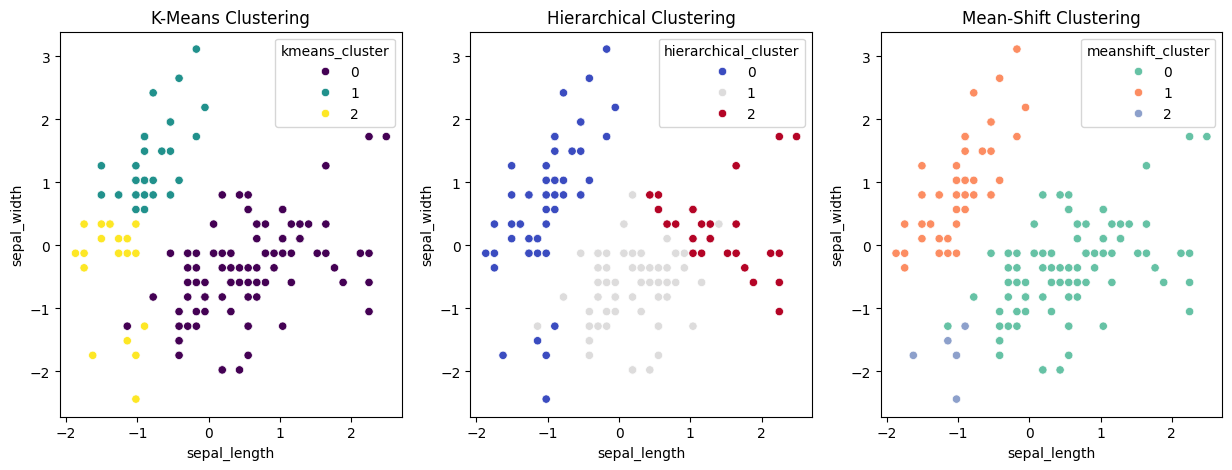

In [37]:
# Visualization of clustering results
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df_scaled["sepal_length"], y=df_scaled["sepal_width"], hue=df_scaled["kmeans_cluster"], palette="viridis")
plt.title("K-Means Clustering")

plt.subplot(1, 3, 2)
sns.scatterplot(x=df_scaled["sepal_length"], y=df_scaled["sepal_width"], hue=df_scaled["hierarchical_cluster"], palette="coolwarm")
plt.title("Hierarchical Clustering")

plt.subplot(1, 3, 3)
sns.scatterplot(x=df_scaled["sepal_length"], y=df_scaled["sepal_width"], hue=df_scaled["meanshift_cluster"], palette="Set2")
plt.title("Mean-Shift Clustering")

plt.show()



# Findings
<p style="font-size:14px;">
<strong>K-Means Clustering:</strong> Forms three well-separated clusters, but the cluster boundaries are rigid and sensitive to initial centroid placement.
</p>

<p style="font-size:14px;">
<strong>Hierarchical Clustering:</strong> Also identifies three clusters but shows some overlap, indicating a more structure-driven grouping approach.
</p>

<p style="font-size:14px;">
<strong>Mean-Shift Clustering:</strong> Produces clusters of varying densities and more organic shapes, adapting better to natural patterns in the data but potentially over-segmenting.
</p>
